# Random Forest Classification
**Stock Sentiment Analysis**
([source link](https://machinelearningprojects.net/stock-sentiment-analysis/))

In this project, we will see how we can perform stock sentiment analysis using the headlines of a newspaper. We will predict if the stock market will go up or down.

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("data/Data.csv", index_col="Date")
df.head(3)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


Range date of dataset

In [3]:
df.index.min(), df.index.max()

('2000-01-03', '2016-07-01')

Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4101 entries, 2000-01-03 to 2016-07-01
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4101 non-null   int64 
 1   Top1    4101 non-null   object
 2   Top2    4101 non-null   object
 3   Top3    4101 non-null   object
 4   Top4    4101 non-null   object
 5   Top5    4101 non-null   object
 6   Top6    4101 non-null   object
 7   Top7    4101 non-null   object
 8   Top8    4101 non-null   object
 9   Top9    4101 non-null   object
 10  Top10   4101 non-null   object
 11  Top11   4101 non-null   object
 12  Top12   4101 non-null   object
 13  Top13   4101 non-null   object
 14  Top14   4101 non-null   object
 15  Top15   4101 non-null   object
 16  Top16   4101 non-null   object
 17  Top17   4101 non-null   object
 18  Top18   4101 non-null   object
 19  Top19   4101 non-null   object
 20  Top20   4101 non-null   object
 21  Top21   4101 non-null   object
 22  Top22   4101 n

Check for null values

In [5]:
df.isnull().sum()

Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

## Dropping the null values

In [6]:
df = df.dropna()
df.isnull().sum()

Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

## Distribution of Labels

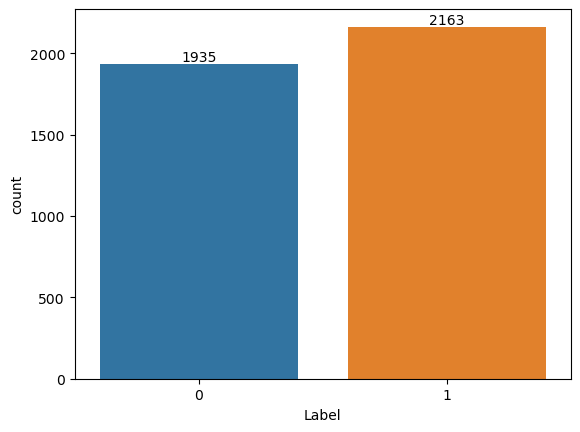

In [7]:
ax = sns.countplot(df, x="Label")
for i in ax.containers:
    ax.bar_label(i)

## Cleaning our dataset

In [8]:
headlines = []

cleaned_df = df.copy()
cleaned_df.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
cleaned_df.replace("[ ]+", " ", regex=True, inplace=True)

for row in range(len(df)):
    headlines.append(" ".join(cleaned_df.iloc[row, 1:]).lower())

print("\nFirst five items of headlines:\n")
for i in headlines[:5]:
    print(f"{i[:80]}...")


First five items of headlines:

a hindrance to operations extracts from the leaked reports scorecard hughes inst...
scorecard the best lake scene leader german sleaze inquiry cheerio boyo the main...
coventry caught on counter by flo united s rivals on the road to rio thatcher is...
pilgrim knows how to progress thatcher facing ban mcilroy calls for irish fighti...
hitches and horlocks beckham off but united survive breast cancer screening alan...


## Initializing CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
cv.fit(headlines)

CountVectorizer(ngram_range=(2, 2))

## Splitting the dataset into the Training set and Test set

In [10]:
len_train_data = int(0.80 * len(cleaned_df))

train_data = cleaned_df.iloc[:len_train_data, :]
test_data = cleaned_df.iloc[len_train_data:, :]

X_train = cv.transform(headlines[:len_train_data])
X_test = cv.transform(headlines[len_train_data:])

y_train = train_data['Label'].values
y_test = test_data['Label'].values

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (3278, 605008)
X_test (820, 605008)
y_train (3278,)
y_test (820,)


## Training the Random Forest Classification model

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=100)

## Predicting the test set

In [12]:
y_pred = rfc.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,0,1
1,1,1
2,0,1
3,1,1
4,1,1
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       383
           1       0.54      0.58      0.56       437

    accuracy                           0.51       820
   macro avg       0.50      0.50      0.50       820
weighted avg       0.50      0.51      0.51       820



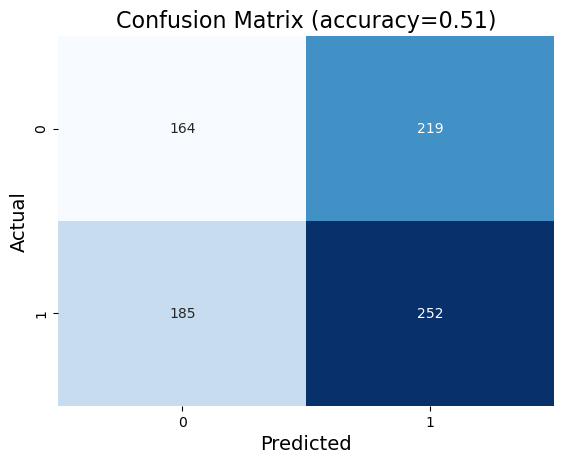

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);